## Start a Python Project

Import the packages needed


In [1]:
# Packages for handling files
import os
import zipfile
import shutil
# Packages for reading and plotting data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Import the point data from github


In [2]:
PID_Metadata = pd.read_csv('https://raw.githubusercontent.com/Police-Involved-Deaths-CA/Data/main/MostRecentUpdate/PID_locations_Metadata.csv')

print('Metadata')
print(PID_Metadata)

PID_locations = pd.read_csv('https://raw.githubusercontent.com/Police-Involved-Deaths-CA/Data/main/MostRecentUpdate/PID_locations.csv')

print('\nData Preview')
print(PID_locations.head())

PID_locations.to_csv('Data/temp_files/PID_locations.csv')

Metadata
   Unnamed: 0                   Key  \
0           0    Most Recent Update   
1           1  Primary Data Sources   
2           2                Notes:   
3           3            Created by   
4           4            Other Info   

                                              Values  
0                                         2023-02-12  
1  CBC Deadly Force 2018: https://newsinteractive...  
2  These point locations have been geocoded using...  
3                                       June Skeeter  
4  Police_Killings_Locations contains only locati...  



Data Preview
         date  INDEX id_victim first_name  last_name middle_name   age gender  \
0  2000-01-05    235   235_KCC       Paul    Murdock         NaN  25.0    NaN   
1  2000-01-19    236   236_KCC      Lloyd  Dustyhorn         NaN  53.0   Male   
2  2000-01-29    237   237_KCC     Rodney     Naitus         NaN  25.0   Male   
3  2000-01-30    238   0413_V1     Stuart   Mitchell         NaN  49.0   Male   
4  2000-02-03    239   239_KCC   Lawrence     Wegner         NaN  30.0   Male   

            race ethnic_ancestry  ... ds_rank                   Type    GC  \
0  Not Specified   Not Specified  ...     NaN  Police Involved Death  True   
1     Indigenous   Not Specified  ...     NaN         Police Killing  True   
2     Indigenous   Not Specified  ...     NaN         Police Killing  True   
3  Not Specified   Not Specified  ...     NaN         Police Killing  True   
4     Indigenous   Not Specified  ...     NaN         Police Killing  True   

  GC_City_Only   latitude   lo

## Import the Census Data

Extract a .zipfile of census data downloaded from simply analytics

* Read the metadata


In [3]:
BC_Census_Data = 'SimplyAnalytics_Shapefiles_2023-02-02_23_07_59_7fa10dab487cee919a8d7e30ddf85ff3'

with zipfile.ZipFile('Data/'+BC_Census_Data+'.zip','r') as BCD:
  print('.zipfile contains:')
  print (BCD.namelist())
  BCD.extractall('Data/temp_files/')

print('\n Varible Names:')

with open('Data/temp_files/variable_names.txt') as var_name:
  print(var_name.read())

.zipfile contains:
['SimplyAnalytics_Shapefiles_2023-02-02_23_07_59_7fa10dab487cee919a8d7e30ddf85ff3.dbf', 'SimplyAnalytics_Shapefiles_2023-02-02_23_07_59_7fa10dab487cee919a8d7e30ddf85ff3.prj', 'SimplyAnalytics_Shapefiles_2023-02-02_23_07_59_7fa10dab487cee919a8d7e30ddf85ff3.shx', 'SimplyAnalytics_Shapefiles_2023-02-02_23_07_59_7fa10dab487cee919a8d7e30ddf85ff3.shp', 'variable_names.txt']

 Varible Names:
VALUE0	# Household Population by Aboriginal Identity | Household Population For Aboriginal Identity | Aboriginal Identity, 2022
VALUE1	# Basics | Total Population, 2022
VALUE2	# Household Population by Visible Minority Status | Household Population For Visible Minority | Visible Minority Total, 2022



## Read the Shapefile

* Rename the columns
* Change the projection
* Calculate the new columns
* Plot a map


Text(0.5, 1.0, 'Population by BC Sub-Divison 2022')

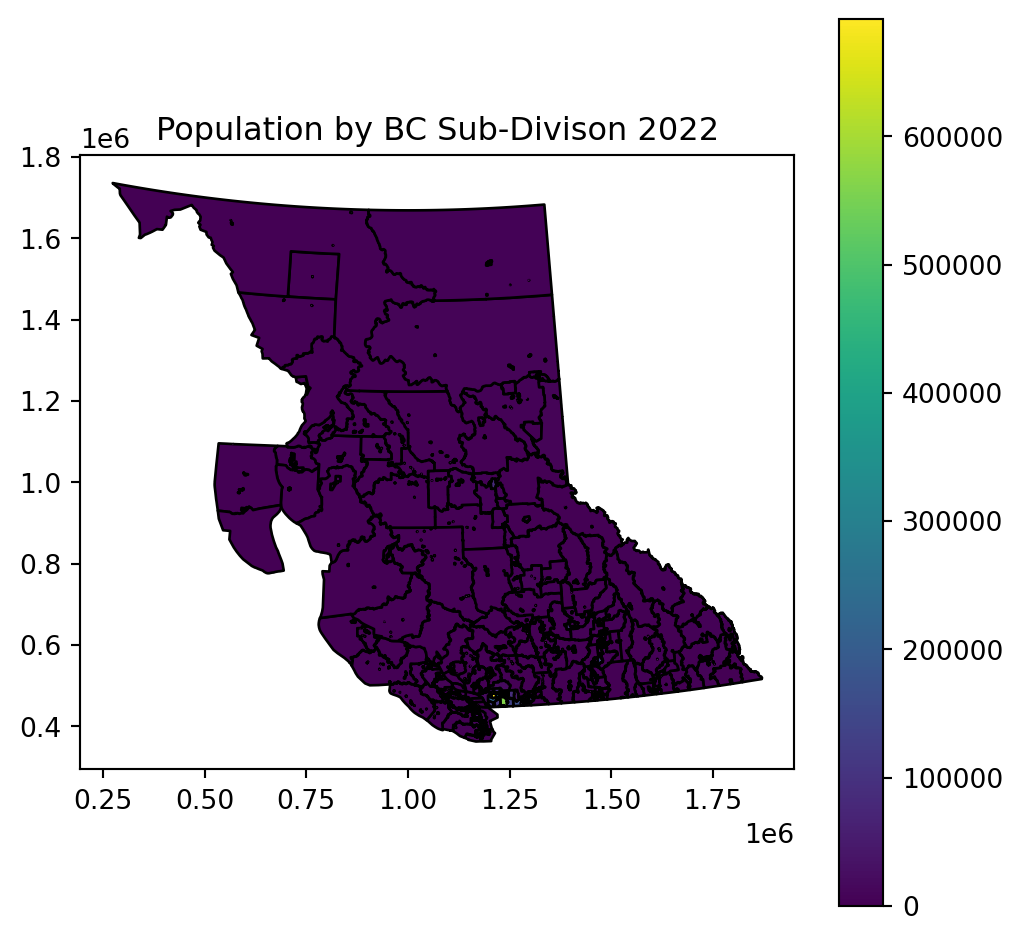

In [4]:
# Read Data
BC_subDivs = gpd.read_file('Data/temp_files/'+BC_Census_Data+'.shp')

# Rename Columns
BC_subDivs = BC_subDivs.rename(columns = {
  'VALUE0':'Pop_Indigenous',
  'VALUE1':'Pop_Total',
  'VALUE2':'Pop_Visible_Minority'
})

# Project to BC Albers
BC_subDivs = BC_subDivs.to_crs(3005)

# Calculate White and Non-White Population Totals
BC_subDivs['Pop_NonWhite'] = BC_subDivs[['Pop_Indigenous','Pop_Visible_Minority']].sum(axis=1)
BC_subDivs['Pop_White'] = BC_subDivs['Pop_Total'] - BC_subDivs['Pop_NonWhite']

# Make a Map
fig,ax=plt.subplots(figsize=(6,6))
BC_subDivs.plot(column='Pop_Total',ax=ax,edgecolor='k',legend=True)
ax.set_title('Population by BC Sub-Divison 2022')

## Saving Data

Lets save the data and also create a .zip file so the data can be downloaded more easily.


In [5]:
# Shapefile is a more complex format often used in desktop GIS.  We're saving to a temp folder because we will then zip the data for easier download
BC_subDivs.to_file('Data/temp_files/BC_subDivs_2022.shp')

# Save the .shp to a .zip for easier download
filepath = 'Data/Workshop_Data.zip'

# Delete old .zip file *if it exists*
try:
  os.unlink(filepath)
except:
  pass

with zipfile.ZipFile(filepath, 'a') as zipf:
    source_path = 'Data/temp_files/'
    source_name = 'BC_subDivs_2022'
    destination_name = 'BC_subDivs_2022'
    # Add the BC_subDivs_2022.shp
    for tag in ['.shp','.dbf','.prj','.shx']:
      zipf.write(source_path+source_name+tag, destination_name+tag)

    # Add the deaths data as well
    source_path = 'Data/PID_locations.csv'
    destination = 'PID_locations.csv'
    zipf.write(source_path, destination)

# Delete data in temp_files
for root, dirs, files in os.walk('Data/temp_files'):
    for f in files:
      if f != '.gitignore':
        os.unlink(os.path.join(root, f))

C:\Users\User\AppData\Local\Temp\ipykernel_24684\1093180775.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  BC_subDivs.to_file('Data/temp_files/BC_subDivs_2022.shp')
